In [15]:
import lovelyplots
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
from qutip import average_gate_fidelity, destroy, qeye, tensor
from scipy.optimize import curve_fit

from corral_crowding.detuning_fit import compute_infidelity_parameters, decay_fit

In [16]:
# Define detuning range (MHz)
detuning_list = np.linspace(50, 1000, 128)
infidelity_params, fidelity_results = compute_infidelity_parameters(
    detuning_list, lambdaq=0.08, eta=1.8, alpha=120e6, g3=60e6
)

/tmp/ipykernel_490893/4061324274.py:70: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  legend_intra = ax.legend(
/tmp/ipykernel_490893/4061324274.py:80: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  legend_inter = ax.legend(


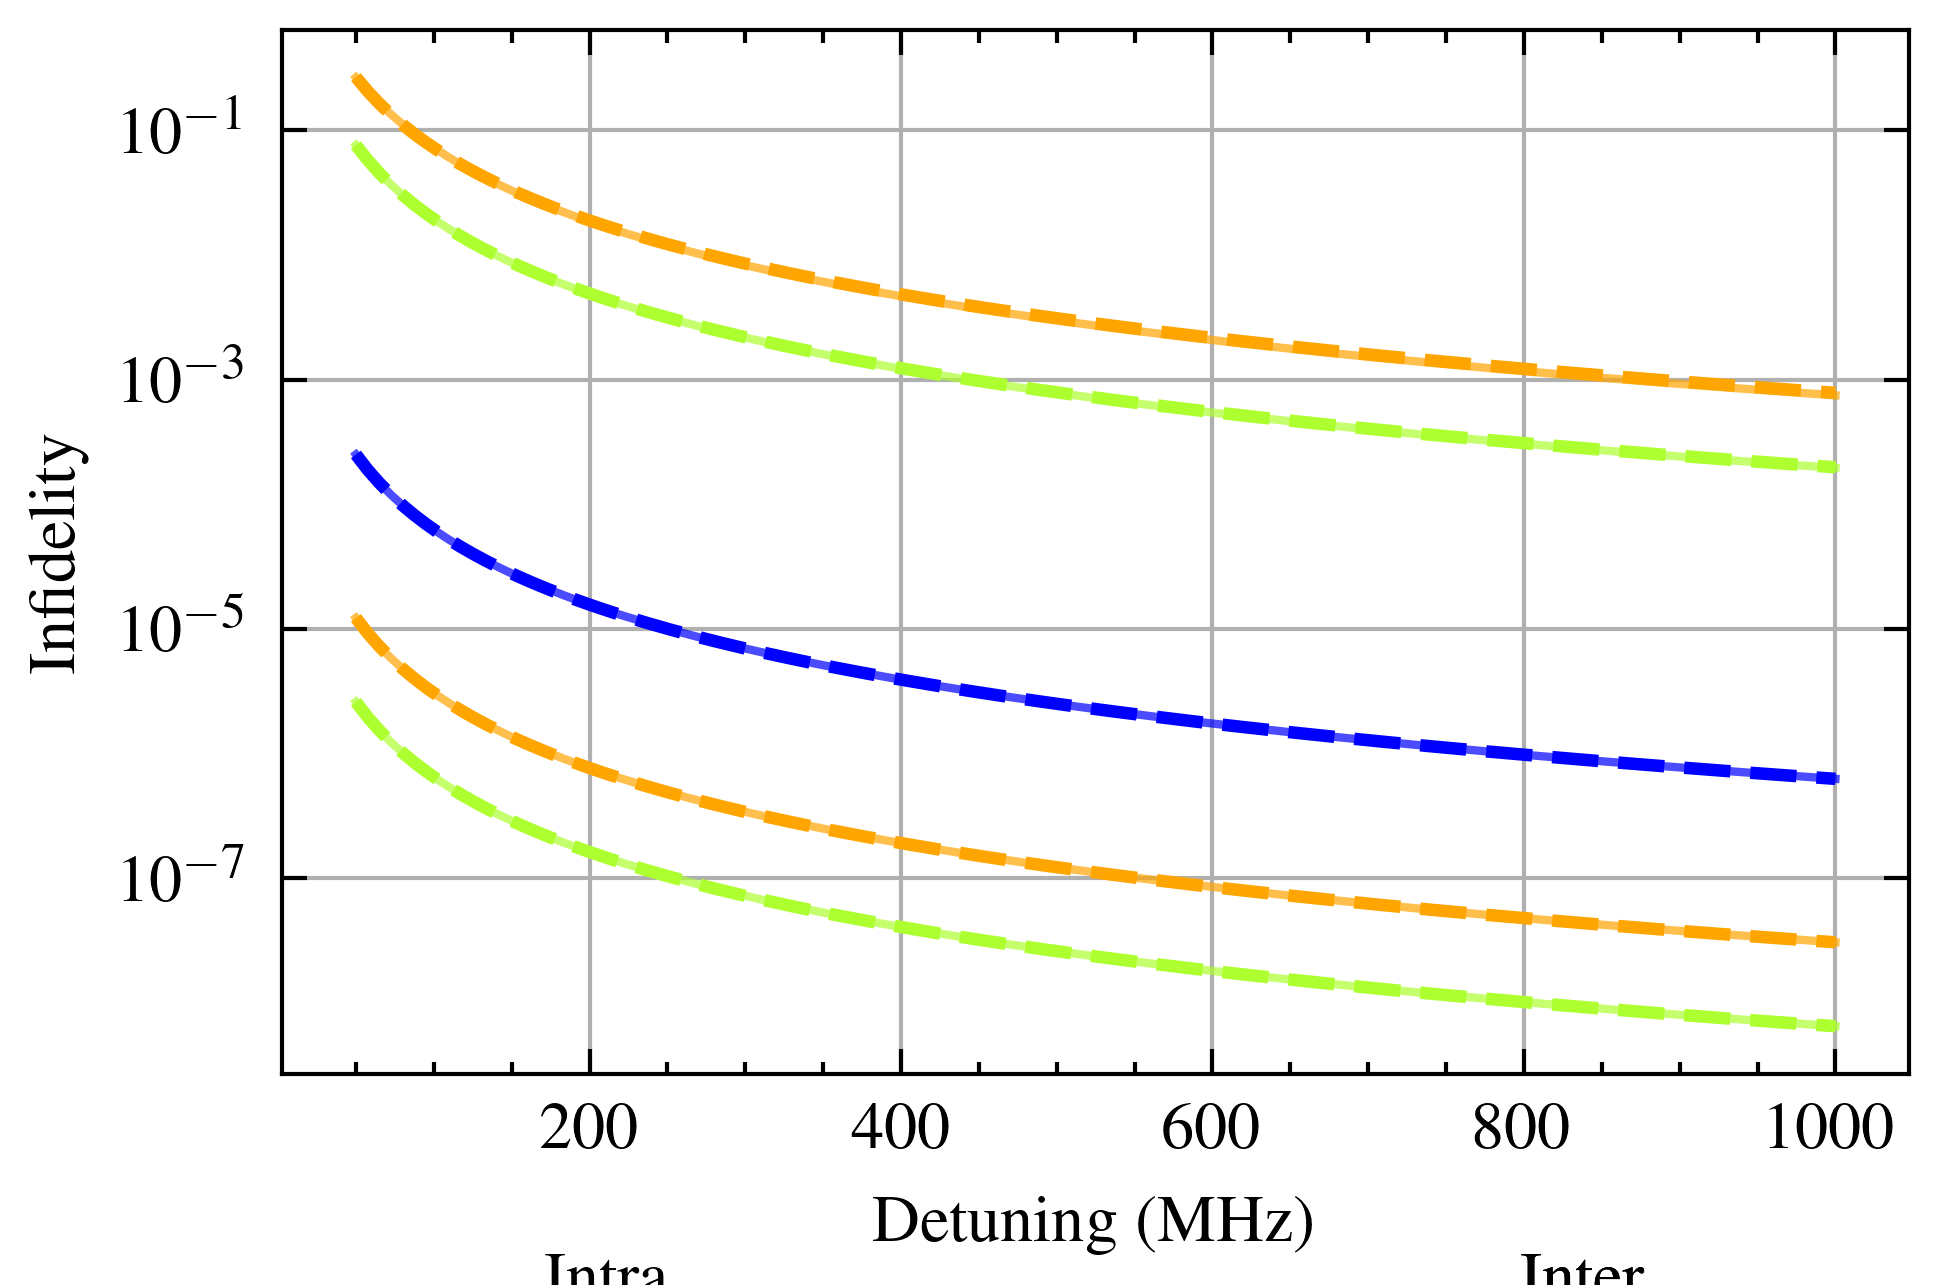

In [17]:
# === Plotting with Clear Distinction Between Data and Fit === #
color_map = {
    "qubit-qubit": ("blue", "-"),
    "snail-qubit": ("orange", "-"),
    "snail-qubit (inter)": ("orange", ":"),
    "qubit-sub": ("greenyellow", "-"),
    "qubit-sub (inter)": ("greenyellow", ":"),
}

with plt.style.context(["ieee", "use_mathtext", "science"]):
    fig, ax = plt.subplots(figsize=(3.5, 3))

    # Prepare separate lists for raw-data legend entries:
    handles_intra = []
    labels_intra = []
    handles_inter = []
    labels_inter = []

    # Plot raw data (scatter) and build the legend lists
    for label, fidelities in fidelity_results.items():
        color, linestyle = color_map[label]
        # Choose marker style based on whether the label is 'inter'
        if " (inter)" in label:
            marker = "*"  # Square marker for inter data
        else:
            marker = "o"  # Dot marker for intra data

        sc = ax.plot(
            detuning_list,
            fidelities,
            label=label,  # keep original key for plotting
            color=color,
            # marker=marker,
            alpha=0.7,
        )
        # Modify the label for legend display:
        # • Remove " (inter)" if present.
        # • Replace "snail-qubit" with "SNAIL-qubit" for display.
        if " (inter)" in label:
            clean_label = label.replace(" (inter)", "")
            if "snail-qubit" in clean_label:
                clean_label = clean_label.replace("snail-qubit", "SNAIL-qubit")
            handles_inter.append(sc)
            labels_inter.append(clean_label)
        else:
            new_label = label
            if "snail-qubit" in new_label:
                new_label = new_label.replace("snail-qubit", "SNAIL-qubit")
            handles_intra.append(sc)
            labels_intra.append(new_label)

    # Plot damped decay fits (line plots) without legend labels
    for label, params in infidelity_params.items():
        fit_curve = decay_fit(detuning_list, *params)
        color, linestyle = color_map[label]
        ax.plot(
            detuning_list,
            fit_curve,
            color=color,
            linestyle="--",
            linewidth=1.5,
        )

    ax.set_xlabel("Detuning (MHz)")
    ax.set_ylabel("Infidelity")
    ax.set_yscale("log")
    ax.grid(True)

    # Create the legend for Intra raw data
    legend_intra = ax.legend(
        handles_intra,
        labels_intra,
        title="Intra",
        loc="upper center",
        bbox_to_anchor=(0.2, -0.1),  # adjust horizontal position as needed
        ncol=1,
        fontsize=10,
    )
    # Create the legend for Inter raw data
    legend_inter = ax.legend(
        handles_inter,
        labels_inter,
        title="Inter",
        loc="upper center",
        bbox_to_anchor=(0.8, -0.1),  # adjust horizontal position as needed
        ncol=1,
        fontsize=10,
    )
    # Add both legends so that they appear together
    ax.add_artist(legend_intra)
    ax.add_artist(legend_inter)

    # Increase bottom margin so the legends are fully visible
    fig.subplots_adjust(bottom=0.3)

    plt.show()
    fig.savefig(
        "fidelity_vs_terms_damped_fit.pdf",
        bbox_inches="tight",
        bbox_extra_artists=[legend_intra, legend_inter],
    )